<a href="https://colab.research.google.com/github/PHnarciso/Intro_Biopython/blob/main/Intro_Biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **O que é Biopython?**

O Biopython é uma biblioteca desenvolvida, em Python, para ser aplicada a biologia molecular sendo muito usada em análises bioinformáticas. Em outras palavras, o objetivo do Biopython é tornar o mais fácil possível o uso do Python para bioinformática.

Os recursos do Biopython incluem analisadores para vários formatos de arquivos(BLAST, FASTA, Genbank,...), acesso a bancos de dados biológicos online, como o NCBI(National Center for Biotechnology Information), módulos e classes para análises e anotações de sequências biológicas.

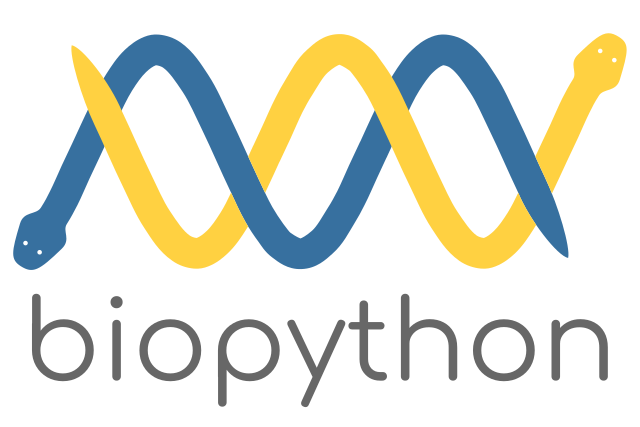

Mais sobre os pacotes, módulos e classes do Biopython podem ser vistos na documentação da biblioteca. Disponível em, http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec2

### Instalação da biblioteca

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.4 MB/s eta 0:00:00


In [2]:
#Importar biblioteca
import Bio

## **O "Hello World" do Biopython**

Podemos considerar a leitura de sequências primárias como os primeiros passos do Biopython, assim como executar o comando para imprimir "Hello World" na tela, quando começamos aprender Python.


In [3]:
# Declarando o uso do modulo Bio.Seq e classe Seq
from Bio.Seq import Seq

sequencia = Seq("AGTACACTGGT")
print(sequencia)

# Pergunta - Posso incluir qualquer letra
# sequencia2 = Seq("AGTACADTGGFT")
# print(sequencia2)

AGTACACTGGT


Vale lembrar que a sequência "AGTACACTGGT" é declarada como um objeto de Seq e portanto suporta alguns métodos que uma string não suportaria. Como a impressão do **complemento e/ou complemento reverso de uma sequência**

Você **NÃO** poderia fazer isso com uma string simples:

In [4]:
sequencia = Seq("AGTACACTGGT")

# Exibindo a sequencia complementar
print(sequencia.complement())

# Exibindo o complemento reverso da sequencia
print(sequencia.reverse_complement())

TCATGTGACCA
ACCAGTGTACT


Se o conteúdo da variável *sequencia* fosse uma string o método ***complement()*** ou ***reverse_complement*** não poderiam ter sido usados e o Python retornaria um erro.

## **Outras formas de manipular sequências**

Além das funções já mencionadas, existêm muitas outras relevantes para o contexto biológico, como os métodos ***transcribe()*** e ***translate()***, que fazem o processo de transcrição e tradução biológica, respectivamente.

### **Transcrição**

A transcrição do DNA em mRNA usando o Biopython, pode ser feita assim:

In [5]:
# Declarando sequencia de DNA
dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print(dna)

# Transcrevendo a sequencia
rna_mensageiro = dna.transcribe()
print(rna_mensageiro)

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG


O Biopython também possui uma método para a transcrição reversa, transformando um mRNA em DNA.

In [6]:
# Tornado o mRNA em DNA novamente
dna_reverso = rna_mensageiro.back_transcribe()
print(dna_reverso)

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


### **Tradução**

Para traduzir o mRNA na sequência de aminoácidos correspondente, usamos ***translate()***:

In [7]:
# Traduzindo o mRNA
proteina = rna_mensageiro.translate()
print(proteina)

MAIVMGR*KGAR*


Observe que além da sequência de aminoácidos também vemos o caractere *, que representa o stop códon.

O ***translate()*** também funciona quando damos como input uma sequência de DNA.

In [8]:
dna = Seq("ATGGCCATTCGCAAGGGTGCCCGATAG")
proteina_dna = dna.translate()

# traduzindo ate o stop codon
stop_proteina = dna.translate(to_stop = True)

# especificar o simbolo de stop codon
stop_proteina2 = dna.translate(stop_symbol = "$")

print(proteina_dna)
print(stop_proteina)
print(stop_proteina2)

MAIRKGAR*
MAIRKGAR
MAIRKGAR$


### **Tabelas de tradução**

O método de tradução usa tabelas de códons para fazer a conversão das sequências de DNA/RNA para aminoácidos.

Tais tabelas são derivadas do NCBI e podem ser acessadas aqui: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi.

In [9]:
# Declarando o modulo Bio.data e CodonTable
from Bio.Data import CodonTable

# definindo tabelas em variaveis
tabela_padrao = CodonTable.unambiguous_dna_by_name["Standard"]
tabela_vertebrado = CodonTable. unambiguous_dna_by_name["Vertebrate Mitochondrial"]

print(tabela_padrao)
print(tabela_vertebrado)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Você também pode visualizar start e stop códons das tabelas, usando:

In [10]:
print(tabela_padrao.stop_codons)
print(tabela_padrao.start_codons)

['TAA', 'TAG', 'TGA']
['TTG', 'CTG', 'ATG']


## **Trabalhando com sequências: arquivos e formatos**

O Biopython também fornece o pacote **Bio.SeqIO** para leitura e gravação de sequências, com suporte a diversos suportes como: fasta, fastaq, swiss, gb, embl e outros.




### Analisando arquivos no formato **fasta**

In [11]:
# Importanto funcoes do google.colab
from google.colab import files

# Upload do arquivo.fasta
files.upload()

KeyboardInterrupt: ignored

A função SeqIO.parse() é a principal função do pacote. Com ela conseguimos ler um arquivo FASTA e retornar informações como: cabeçalhos, conteúdo da sequência e tamanho(usando len em conjunto).

In [ ]:
from Bio import SeqIO

# determinando arquivo e formato de entrada
for i in SeqIO.parse("arquivo.fasta", "fasta"):
    # exibe o cabecalho
    print(i.id)
    # exibe a sequencia
    print(i.seq)
    # exibe o tamanho da sequencia
    print(len(i))


NC_008253.1
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGGGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCATCTGGTAGCGATGATTGAAAAAACCATTAGCGGTCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTCTGACGGGACTCGCCGCCGCCCAGCCGGGATTTCCGCTGGCACAATTGAAAACTTTCGTCGACCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATCAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTGTTAGAAGCGCGTGGTCACAACGTTACCGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGTCATTACCTCGAATCTACCGTTGATATTGCTGAATCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGACCACATGGTGCTGATGGCTGGTTTCACTGCCGGTAATGAAAAAGGCGAGCTGGTGGTTCTGGGACGCAACGGTTCCGACTACTCCGCTGCGGTGCTGGCG
980


## Analisando arquivos com múltiplas seq fasta

Você também pode ler arquivos com várias sequências fasta, extrair infromações que atendam algum requisito e gravar em outro arquivo.

Por exemplo, você pode extrair apenas os identificadores das sequências:

In [ ]:
# fazendo upload do arquivo multi-fasta
files.upload()

Saving multi_FASTA.fasta to multi_FASTA.fasta


{'multi_FASTA.fasta': b'>sequencia_1\nGTCACAG\n>sequencia_2\nGTGTTGTGTGT\n>sequencia_3\nCTCAAACCCAT\n>sequencia_4\nAACCCATTTTTTT\n>sequencia_5\nCCCCAAACCCAAATTT\n'}

In [ ]:
identificadores = [seq_record.id for seq_record in SeqIO.parse("multi_FASTA.fasta", "fasta")]
print(identificadores)

['sequencia_1', 'sequencia_2', 'sequencia_3', 'sequencia_4', 'sequencia_5']


Ou então, você pode extrair do arquivo apenas sequências que:
- sejam maiores do que 10 pb:
- iniciem com uma citosina

In [ ]:
for i in SeqIO.parse("multi_FASTA.fasta","fasta"):
	# Condicao 1 (> 10 pb) | Condicao 2 == 'C'
  if len(i.seq) > 10 and i.seq[0] == 'C':
    print(i.seq)

CTCAAACCCAT
CCCCAAACCCAAATTT


E se você quiser gravar essa informação em um novo arquivo?

In [ ]:
# armazenando o arquivo na variavel entrada
entrada = open("multi_FASTA.fasta","r")

# definindo variavel saida
saida = open("arquivo2.fasta", "w")

for i in SeqIO.parse(entrada,"fasta"):

	# Condicao 1 (> 10 pb) | Condicao 2 == 'C'
	if ( (len(i.seq) > 10) and (i.seq[0] == 'C')):
		SeqIO.write(i, saida, "fasta")

saida.close()


Visualizando o arquivo:

In [ ]:
arquivo_novo = open("arquivo2.fasta")
print(arquivo_novo.read())

>sequencia_3
CTCAAACCCAT
>sequencia_5
CCCCAAACCCAAATTT



### Usando o formato GenBank

Utilizando a mesma sintaxe podemos analisar arquivos do banco de dados do NCBI.

In [ ]:
# Upload do arquivo .gb
files.upload()

Saving NC_009934.gb to NC_009934.gb


{'NC_009934.gb': b'LOCUS       NC_009934               2133 bp    DNA     circular CON 16-FEB-2022\nDEFINITION  Acaryochloris marina MBIC11017 plasmid pREB9, complete sequence.\nACCESSION   NC_009934\nVERSION     NC_009934.1\nDBLINK      BioProject: PRJNA224116\n            BioSample: SAMN02604308\n            Assembly: GCF_000018105.1\nKEYWORDS    RefSeq.\nSOURCE      Acaryochloris marina MBIC11017\n  ORGANISM  Acaryochloris marina MBIC11017\n            Bacteria; Cyanobacteria; Synechococcales; Acaryochloridaceae;\n            Acaryochloris.\nREFERENCE   1  (bases 1 to 2133)\n  AUTHORS   Swingley,W.D., Chen,M., Cheung,P.C., Conrad,A.L., Dejesa,L.C.,\n            Hao,J., Honchak,B.M., Karbach,L.E., Kurdoglu,A., Lahiri,S.,\n            Mastrian,S.D., Miyashita,H., Page,L., Ramakrishna,P., Satoh,S.,\n            Sattley,W.M., Shimada,Y., Taylor,H.L., Tomo,T., Tsuchiya,T.,\n            Wang,Z.T., Raymond,J., Mimuro,M., Blankenship,R.E. and\n            Touchman,J.W.\n  TITLE     Niche ad

In [12]:
from Bio import SeqIO

# Recebendo o arquivo GenBank
for seq_record in SeqIO.parse("NC_009934.gb", "genbank"):
    # exibe o cabecalho
    print(seq_record.id)
    # exibe o tamanho da sequencia
    print(len(seq_record) )

FileNotFoundError: ignored

Diferente do fasta arquivos GenBank possui informações, como nome e posicionamento de genes. Através do módulo SeqIO é possível obtê-las.

In [ ]:
from Bio import SeqIO

# Recebendo arquivo GB
exemplo = SeqIO.read("NC_009934.gb", "gb")

for i in exemplo.features:
	print(i)

type: source
location: [0:2133](+)
qualifiers:
    Key: db_xref, Value: ['taxon:329726']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['type strain of Acaryochloris marina']
    Key: organism, Value: ['Acaryochloris marina MBIC11017']
    Key: plasmid, Value: ['pREB9']
    Key: strain, Value: ['MBIC11017']
    Key: type_material, Value: ['type strain of Acaryochloris marina']

type: gene
location: [278:608](-)
qualifiers:
    Key: locus_tag, Value: ['AM1_RS39520']
    Key: old_locus_tag, Value: ['AM1_I0002']

type: CDS
location: [278:608](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: protein motif:HMM:NF025653.2']
    Key: locus_tag, Value: ['AM1_RS39520']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology.']
    Key: old_locus_tag, Value: ['AM1_I0002']
    Key: product, Value: ['PAN domain-containing protein']
    Key: protein_id, Value: ['WP_012168531.1']
 

No exmplo acima todas as *features*(características do organimo) de um arquivo GenBank são printadas na tela.

Para obter o nome de produtos codificados podemos utilizar a sintaxe:

In [ ]:
from Bio import SeqIO

exemplo = SeqIO.read("NC_009934.gb", "genbank")

# especificando a feature CDS e a chave product
for i in exemplo.features:
	if i.type == 'CDS':
		print(i.qualifiers['product'] )

['PAN domain-containing protein']
['IS1-like element ISAcma36 family transposase']


In [ ]:
# Exemplo com outra feature
...

## **Convertendo formatos: GenBank para FASTA**

Com a função SeqIO.convert() podemos converter arquivos .gb para o formato FASTA.

Pode ser usada, assim:

In [ ]:
from Bio import SeqIO

SeqIO.convert("NC_009934.gb", "gb", "NC_0099341.fasta", "fasta")

### **BLAST**

Através do Biopython também podemos acessar a ferramenta **BLAST**(Basic Local Alignment Search Tool, por meio do pacote Bio.Blast. Lembrando que podemos usá-la com bases de dados locais ou online.

## Busca pela internet

O módulo qblast permite a busca por meio de scripts em Python. A sintaxe de uso é: "NCBI.qblast(parâmetros)

Sendo os parâmetros mais comuns:
- program --> blastn, blastp, blastx, tblastn ou tblastx;
- database --> Base de dados desejada;
- sequence --> sequéncia de entrada
- description --> # de descrições exibidas(default: 500);
- alignments --> # de alinhamentos exibidos(default: 500);
- expect --> Valor de cutoof (default: 10.0);
- format_type --> “HTML”, “Text”, “ASN.1” ou “XML” (default: "XML");
...

In [ ]:
# Upload da seq para busca HBB_blast
files.upload()

Saving HBB_blast.fasta to HBB_blast.fasta


{'HBB_blast.fasta': b'>NC_000011.10:c5227071-5225464 Homo sapiens chromosome 11, GRCh38.p14 Primary Assembly\nACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGA\nGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGC\nAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAG\nACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGG\nTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGG\nCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGAC\nAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACT\nTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAG\nGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCT\nCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCT\nTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATA\nTCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAAT\nATATGTGTGCTTATTTGCATATTCAT

In [13]:
# Chamando bibliotecas e módulos
from Bio.Blast import NCBIWWW
from Bio import SeqIO

# definindo arquivo de entrada
seq_entrada = SeqIO.read("HBB_blast.fasta", format="fasta")

print("Iniciando busca...")

# realizando o BLAST
resultado = NCBIWWW.qblast("blastn", "nt", \
seq_entrada.seq, format_type="Text")

# Visualizar resultado
print(resultado.read())

print("BLAST concluido." )

FileNotFoundError: ignored

Atenção, se após a execução o script travar na mensagem "Iniciando busca...", deve ter ocorrido algum problema ao conectar-se com o bando. É indicado esperar por alguns minutos e se mesmo assim não funcionar podemos interromper a busca com CONTROL + C e executar novamente. IMPORTANTE, para a execução correta é necessário que haja conexão com a internet, o tempo de busca pode variar de acordo com a velocidade da conexão.

No exemplo visualizamos o resultado no formato Text que nos permite uma visualização mais simples da sáida, mas também podemos visualizar utilizando o formato XML, sendo esse mais completo e eficiente, assim:

In [ ]:
from Bio.Blast import NCBIXML
from Bio import SeqIO

seq_entrada = SeqIO.read("HBB_blast.fasta", format="fasta")

print("Iniciando busca..." )

resultado = NCBIWWW.qblast("blastn", "nt", \
seq_entrada.seq, format_type="XML")

print("BLAST concluido, salvando resultados..." )

# Escrevendo o resultado em um arquivo XML
saida = open("blast_resultado.xml", "w")
saida.write(resultado.read())
saida.close()

# Lendo arquivos XML
arquivo_xml = open("blast_resultado.xml","r")
dados = NCBIXML.parse(arquivo_xml)
item = next(dados)

i = 1

for a in item.alignments:
	for hsp in a.hsps:
		print('Alinhamento',i)
		print('Sequencia: '+a.title)
		print('Tamanho: ',a.length)
		print('Score: ',hsp.score)
		print('Gaps: ',hsp.gaps)
		print(hsp.query )
		print(hsp.match)
		print(hsp.sbjct)
		print("\n")
		i+=1

print("Executado com sucesso." )

Iniciando busca...
BLAST concluido, salvando resultados...
Alinhamento 1
Sequencia: gi|1584134018|gb|MK476491.1| Homo sapiens voucher Yoruba_13_0 hemoglobin subunit beta (HBB) gene, complete cds
Tamanho:  1824
Score:  3216.0
Gaps:  0
ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGA

## BLAST local

Realizar o BLAST localmente permite que as buscas sejam realizadas em menos tempo, além de permitir a criação de um banco de dados personalizado. Apesar disso, o BLAST local requer a instalação de ferramentas de linha de comando e que bancos de dados sejam configurados, mantidos e atualizados - o que torna seu uso mais complexo e por isso não abordaremos aqui. Mais sobre seu uso, pode ser visto no Cápitulo 7 da documentação do Biopython(http://biopython.org/DIST/docs/tutorial/Tutorial.html)

## **PDB - Protein Data Bank**

Por meio do Biopython também podemos acessar o banco de dados PDB que armazena informações sobre a estrutura tridimensional de proteínas, sendo fundamental para a biologia estrutural.

Parte de um arquivo textual no formato PDB:
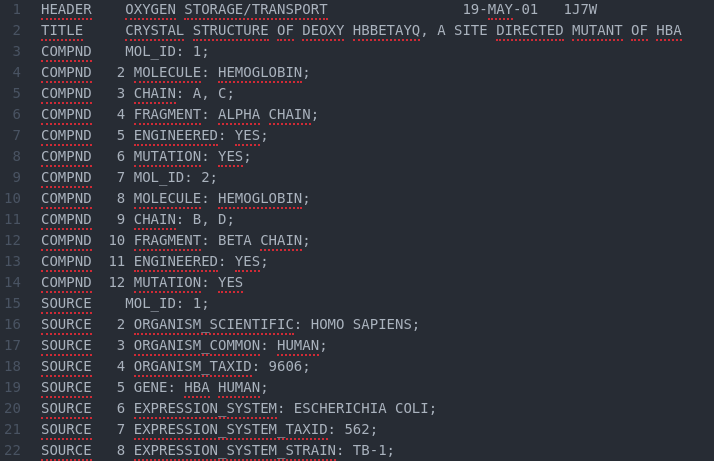

Exemplo de arquivo PDB da estrutura tridimensional da hemoglobina beta humana:
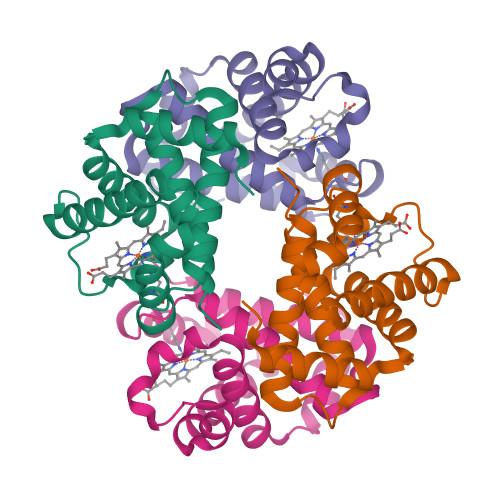

### Pacote PDB - Bio.PDB

Existe um conjunto de classes para analisar e visualizar arquivos e estruturas do PDB, onde é definido que uma proteína pode ser representada em cinco classes hierárquicas:
- estrutura;
- modelo;
- cadeia;
- resíduo;
- átomo;

Baixar o arquivo PDB: Para a análisar um arquivo PDB precisamos primeiro fazer o download do mesmo. Por sorte, o Biopython fornece um método para essa tarefa, que geralmente seria feita acessando a plataforma(Website) do banco de dados. Para baixar o arquivo usaremos a classe PDBlist e o método retrieve_pdb_file()

In [ ]:
from Bio.PDB import *

# Download do arquivo
pdb = PDBList()
pdb.retrieve_pdb_file('1J7W')

Structure exists: '/content/j7/1j7w.cif' 


'/content/j7/1j7w.cif'

Após execução do comando uma nova pasta sera criada e dentro dela encontraremos o arquivo, nesse caso a pasta criada foi "j7" e o arquivo baixado foi 1j7w.cif, que correspode a hemoglobina beta humana.

O formato .cif é agora definido como padrão, por ser mais adequado a protéinas maiores e mais complexas. No entanto, ainda há suporte para arquivos .pdb, **o que nos permite trabalhar com esse formato.**




Upload do arquivo PDB, baixado previamente.

In [ ]:
# Baixando HBB.pdb
files.upload()

Saving HBB.pdb to HBB.pdb


{'HBB.pdb': b'HEADER    OXYGEN STORAGE/TRANSPORT                19-MAY-01   1J7W              \nTITLE     CRYSTAL STRUCTURE OF DEOXY HBBETAYQ, A SITE DIRECTED MUTANT OF HBA    \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: HEMOGLOBIN;                                                \nCOMPND   3 CHAIN: A, C;                                                         \nCOMPND   4 FRAGMENT: ALPHA CHAIN;                                               \nCOMPND   5 ENGINEERED: YES;                                                     \nCOMPND   6 MUTATION: YES;                                                       \nCOMPND   7 MOL_ID: 2;                                                           \nCOMPND   8 MOLECULE: HEMOGLOBIN;                                                \nCOMPND   9 CHAIN: B, D;                                                         \nCOMPND  10 FRAGMENT: BETA CHAIN;                                                \nCO

Iniciando a análise:

In [14]:
from Bio.PDB import *

# Definindo objeto PDBParser
parser = PDBParser()

# Declarando a estrutura pdb como HBB
estrutura = parser.get_structure('HBB', 'HBB.pdb')

FileNotFoundError: ignored

Através dos métodos da classe PDBPaser podemos extrair várias informações do arquivo PDB, como por exemplo os cabeçalhos. Para obter o cabeçalho usamos get_header(), se usada assim será retornada uma grande quantidade de dados armazenadas no cabeçalho.

Apesar disso podemos obtê-las individualmente, assim:

In [ ]:
from Bio.PDB import *
parser = PDBParser()
estrutura = parser.get_structure('HBB', 'HBB.pdb')

# Obtendo o cabeçalho
cabecalho = parser.get_header()

# Filtrando nome
nome = estrutura.header['name']

# Filtrando o metodo de determinacao da estrutura
metodo = estrutura.header['structure_method']

# Filtrando a autoria
autor = estrutura.header['author']

print("Nome:", nome)
print("Metodo: ", metodo)
print("Autoria: ", autor)

Nome: crystal structure of deoxy hbbetayq, a site directed mutant of hba
Metodo:  x-ray diffraction
Autoria:  A.E.Miele,F.Draghi,A.Arcovito,A.Bellelli,M.Brunori,C.Travaglini-Allocatelli,B.Vallone


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4962.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5005.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5048.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5091.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5134.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5208.
  PDBConstru

Dentre os dados do cabeçalho que podemos acessar, temos:
- name;
- head;
- deposition_date;
- release_date;
- structure_method;
- resolution;
- structure_reference;
- journal_reference;
- author;
- e outras;

In [ ]:
# Exemplo com outros items cabeçalho

### Obtendo modelos, cadeias, resíduos e átomos da estrutura

In [ ]:
from Bio.PDB import *
parser = PDBParser()
estrutura = parser.get_structure('HBB', 'HBB.pdb')

# modelos presentes na estrutura
for modelo in estrutura:
    print("Modelo: ", modelo.id)
    # buscando cadeias no modelo
    for cadeia in modelo:
        print("\t - Cadeia: ", cadeia.id)
        # residuos de cada cadeia
        for residuo in cadeia:
          print("\t\t - Residuo: ",residuo.resname,"(",residuo.id[1],")" )
          # atomos de cada residuo
          for atomo in residuo:
            print("\t\t\t - Atomo:",atomo.name, "-> Coordenadas: ( X:",atomo.coord[0], "- Y:",atomo.coord[1],"- Z:", atomo.coord[2],")" )

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4962.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5005.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5048.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5091.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5134.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5208.
  PDBConstru

A saída de streaming foi truncada nas últimas 5000 linhas.
			 - Atomo: CG -> Coordenadas: ( X: 10.746 - Y: 30.397 - Z: 18.647 )
			 - Atomo: OD1 -> Coordenadas: ( X: 11.938 - Y: 30.361 - Z: 18.273 )
			 - Atomo: OD2 -> Coordenadas: ( X: 10.328 - Y: 30.558 - Z: 19.819 )
		 - Residuo:  MET ( 76 )
			 - Atomo: N -> Coordenadas: ( X: 10.094 - Y: 26.28 - Z: 17.505 )
			 - Atomo: CA -> Coordenadas: ( X: 10.026 - Y: 25.138 - Z: 18.397 )
			 - Atomo: C -> Coordenadas: ( X: 11.196 - Y: 24.825 - Z: 19.262 )
			 - Atomo: O -> Coordenadas: ( X: 11.075 - Y: 24.422 - Z: 20.429 )
			 - Atomo: CB -> Coordenadas: ( X: 9.697 - Y: 23.853 - Z: 17.547 )
			 - Atomo: CG -> Coordenadas: ( X: 8.229 - Y: 23.709 - Z: 17.178 )
			 - Atomo: SD -> Coordenadas: ( X: 7.905 - Y: 21.902 - Z: 16.734 )
			 - Atomo: CE -> Coordenadas: ( X: 6.512 - Y: 22.254 - Z: 15.705 )
		 - Residuo:  PRO ( 77 )
			 - Atomo: N -> Coordenadas: ( X: 12.408 - Y: 24.977 - Z: 18.752 )
			 - Atomo: CA -> Coordenadas: ( X: 13.609 - Y: 24.567 

### Estrutura primária

Também podemos obter a estrutura primária das cadeias, por meio da classe CaPPBuilder().



In [ ]:
from Bio.PDB import *
parser = PDBParser()

# Invocando a classe
primaria = CaPPBuilder()

estrutura = parser.get_structure('HBB', 'HBB.pdb')

# Definindo o arquivo FASTA
w = open("HBB_primaria.fasta","w")

for cadeia in estrutura[0]:
	cadeia_atual = cadeia.id
	for seq in primaria.build_peptides(cadeia):
		seq2 = seq.get_sequence()
		tamanho = len(seq)
		HBB_fasta = ">Cadeia_%s_tamanho_%d\n%s\n" %(cadeia_atual,tamanho,seq2)
		print(HBB_fasta)

		w.write(HBB_fasta)

w.close()

>Cadeia_A_tamanho_141
MLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR

>Cadeia_B_tamanho_146
MHLTPEEKSAVTALWGKVNVDEVGGEAYGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAQGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH

>Cadeia_C_tamanho_141
MLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR

>Cadeia_D_tamanho_146
MHLTPEEKSAVTALWGKVNVDEVGGEAYGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAQGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH



/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4962.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5005.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5048.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5091.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5134.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5208.
  PDBConstru

Exibir arquivo criado - HBB_primária.fasta

In [ ]:
arquivo_criado = open("HBB_primaria.fasta")
print(arquivo_criado.read())

>Cadeia_A_tamanho_141
MLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
>Cadeia_B_tamanho_146
MHLTPEEKSAVTALWGKVNVDEVGGEAYGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAQGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH
>Cadeia_C_tamanho_141
MLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
>Cadeia_D_tamanho_146
MHLTPEEKSAVTALWGKVNVDEVGGEAYGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAQGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH



## **Distância entre dois átomos**

Para o cálculo das distâncias o Biopython utiliza as coordenadas do átomo(X, Y e Z) e calcula a distância euclidiana entre eles. Um átomo é reconhecido por:
- atomo = estrutura[modelo][cadeia][posicao_residuo][atomo]

A distância é dada em ångström.

In [ ]:
from Bio.PDB import *

parser = PDBParser()

estrutura = parser.get_structure('HBB', 'HBB.pdb')

#definindo os residuos 2 e 3 da cadeia B
res_2B = estrutura[0]['B'][2]['CA']
res_3B = estrutura[0]['B'][3]['CA']

dist = res_2B - res_3B

print(dist)

#print('A distância entre os resíduos 2 e 3 da cadeia B é igual a ', dist, 'angstrom')

3.8340797
A distância entre os resíduos 2 e 3 da cadeia B é igual a  3.8340797 angstrom


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4962.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5005.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5048.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5091.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5134.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5208.
  PDBConstru

### **Referências**

1. https://biopython.org/DIST/docs/tutorial/Tutorial.html

2. MARIANO, D. C. B.; BARROSO, J. R. P. M. ;CORREIA, T. S. ; de MELO-MINARDI, R. C. .Introdução à Programação para Bioinformática com Biopython. 3.ed. North Charleston, SC (EUA): CreateSpace Independent Publishing Platform, 2015. v. 1. 230p.

